In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from ray import tune

In [3]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATSx
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss, MAE, MSE, RMSE
from neuralforecast.tsdataset import TimeSeriesDataset
from neuralforecast.losses.numpy import rmse, mape
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [4]:
from neuralforecast.models import NHITS

In [5]:
from neuralforecast.utils import AirPassengers, AirPassengersPanel, AirPassengersStatic

In [6]:
df = pd.read_excel('S&P 500 Realized Volatility (NBEATSx).xlsx',index_col='Date',parse_dates=True)

In [7]:
Y_train = df[:1005]

In [8]:
Y_train.reset_index(inplace=True)

In [9]:
Y_train.rename(columns={'Date':'ds'}, inplace=True)

In [10]:
Y_train.rename(columns={'Realised':'y'}, inplace=True)

In [11]:
Y_train.head()

,ds,unique_id,y,S&P 500 Financial Turbulence,VIX,Covid
0,2017-11-02,Airline1,0.004873,806.442547,9.93,0
1,2017-11-03,Airline1,0.003036,702.337034,9.14,0
2,2017-11-06,Airline1,0.001808,529.197112,9.40,0
3,2017-11-07,Airline1,0.003225,512.157114,9.89,0
4,2017-11-08,Airline1,0.002568,493.752126,9.78,0


<AxesSubplot:>

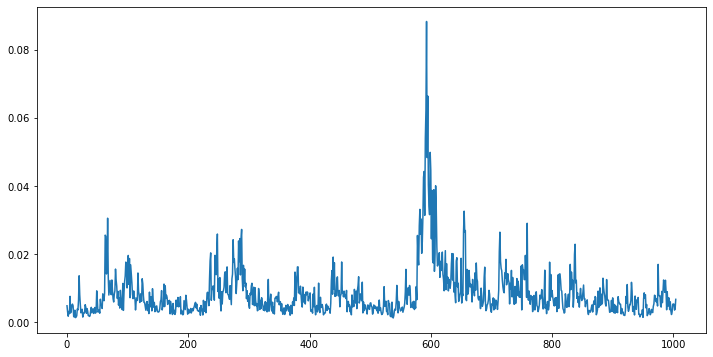

In [12]:
Y_train["y"].plot(figsize=(12,6))

# Validation

In [62]:
RMSE=[]
Accuracy=[]

In [87]:
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=38273928)
fcst = NeuralForecast(
    models=[model],
    freq=CustomBusinessDay(calendar=USFederalHolidayCalendar())
)
forecasts = fcst.cross_validation(df=Y_train,val_size=1,static_df=AirPassengersStatic,n_windows=None, test_size=99,step_size=1)

Global seed set to 38273928


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [88]:
Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds','S&P 500 Financial Turbulence','VIX','Covid','index','cutoff'])
Y_hat=Y_hat_df["NBEATSx"].values
Y_true=Y_hat_df["y"].values
RMSE.append(rmse(y=Y_true, y_hat=Y_hat))
Accuracy.append((1-mape(y=Y_true, y_hat=Y_hat))*100)

In [89]:
RMSE

[0.0010270720165727956,
 0.0010500036324722177,
 0.0010848920032899248,
 0.0010906660923845415,
 0.0011375208644977882,
 0.001148475448881578,
 0.0011989914916691576]

In [90]:
Accuracy

[85.79613158244774,
 85.47662802772894,
 84.087921570478,
 84.70186892563936,
 83.01027563655087,
 81.61734905323208,
 80.20333007285424]

Random seed was chosen as the day, month and year of the experiment
Input size 21
model = NBEATSx(h=1, input_size=21,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE=0.0012750256725123019
Accuracy=77.80546741444739

Input size 63
model = NBEATSx(h=1, input_size=63,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE=0.0010755322612348156
Accuracy=82.3072127877507

Input size 84
model = NBEATSx(h=1, input_size=84,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE=0.0010273686277538063
Accuracy=85.51925881155009

Input size 126
model = NBEATSx(h=1, input_size=126,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE=0.0011649990783474116
Accuracy=82.24982139829756

Input size 189
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=542023)

RMSE=0.0010618705548875766
Accuracy=81.86580782354214

Input size 252
model = NBEATSx(h=1, input_size=252,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=542023)
                
RMSE=0.0010955727333856354
Accuracy=82.84625280456127

Having random seed 30082001 (main author's birthday) to assess the best inputs

Input size 63
model = NBEATSx(h=1, input_size=63,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=30082001)

RMSE=0.0010755322612348156
Accuracy=81.91526795443387

Input size 84
model = NBEATSx(h=1, input_size=84,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=30082001)

RMSE=0.0010756347388265707
Accuracy=85.11723977923722

Input size 189
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=30082001)

RMSE=0.0010150318294162904
Accuracy=87.01580616696137

Having random seed 164808 to assess the best inputs

Input size 84
model = NBEATSx(h=1, input_size=84,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=164808)

RMSE=0.0010744056750138413
Accuracy=84.29002774532431

Input size 189
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=164808)

RMSE=0.0010270720165727956
Accuracy=85.79613158244774

Input size of 189 was chosen
Having random seed as 1
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=1)

RMSE=0.0010500036324722177
Accuracy=85.47662802772894

Scaler type = standard
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='standard',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=1)

RMSE=0.0010848920032899248
Accuracy=84.087921570478

Robust was chosen

Having random seed as 38273928
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=38273928)

RMSE=0.0010906660923845415
Accuracy=84.70186892563936

n_blocks = [2,2]
Having random seed as 38273928
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[2, 2],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=38273928)

RMSE=0.0011375208644977882
Accuracy=83.01027563655087

n_blocks = [3,3]
Having random seed as 38273928
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[3, 3],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=38273928)

RMSE=0.001148475448881578
Accuracy=81.61734905323208

n_blocks = [4,4]
Having random seed as 38273928
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[4, 4],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=38273928)

RMSE=0.0011989914916691576
Accuracy=80.20333007285424

n_blocks = [1,1] was chosen
Hyperparameters selection finalized

Chosen model
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=1,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=random.randint(0, 10000000))


In [97]:
Y_train = df
Y_train.reset_index(inplace=True)
Y_train.rename(columns={'Date':'ds'}, inplace=True)
Y_train.rename(columns={'Realised':'y'}, inplace=True)

In [98]:
RMSE=[]
Accuracy=[]

In [170]:
model = NBEATSx(h=1, input_size=189,
                loss=MSE(),
                scaler_type='robust',
                stat_exog_list=['Covid'],
                learning_rate=0.0001,
                stack_types=['identity','identity'],
                n_blocks=[1, 1],
                mlp_units=[[712, 712], [712, 712]],
                windows_batch_size=30,
                num_lr_decays=4,
                val_check_steps=10,
                n_harmonics=0, n_polynomials=0,
                hist_exog_list=['S&P 500 Financial Turbulence','VIX'],
                max_steps=100,
                early_stop_patience_steps=0,
                random_seed=random.randint(0, 10000000))
fcst = NeuralForecast(
    models=[model],
    freq=CustomBusinessDay(calendar=USFederalHolidayCalendar())
)
forecasts = fcst.cross_validation(df=Y_train,val_size=1,static_df=AirPassengersStatic,n_windows=None, test_size=252,step_size=1)

Global seed set to 3875327


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [171]:
Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds','S&P 500 Financial Turbulence','VIX','Covid','index','cutoff'])
Y_hat=Y_hat_df["NBEATSx"].values
Y_true=Y_hat_df["y"].values
RMSE.append(rmse(y=Y_true, y_hat=Y_hat))
Accuracy.append((1-mape(y=Y_true, y_hat=Y_hat))*100)

In [172]:
RMSE

[0.0037449405598716503,
 0.003765792743967503,
 0.0037370779363994086,
 0.003776236967893844,
 0.003734888349977097,
 0.0037384231225195404,
 0.0037785803767120944,
 0.0037407233906606046,
 0.0037407681608780993,
 0.0037780651329522488,
 0.003738412794224599,
 0.003776460905382644,
 0.003762699578307295,
 0.0037474797298412805,
 0.0037513275551501377]

In [173]:
Accuracy

[83.05230628215683,
 83.05579597842298,
 82.95856572093021,
 82.76367258467413,
 83.18062304862288,
 83.10439149516871,
 82.77140544446635,
 83.4068118220175,
 82.87749303836353,
 83.05449472099849,
 83.19360830587401,
 82.52835790141167,
 82.5828382824075,
 83.00888942682403,
 83.25953030803154]

Text(0, 0.5, 'S&P 500 Realized Volatility')

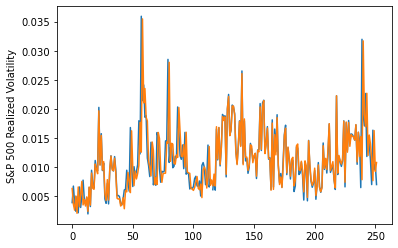

In [127]:
plt.plot(range(len(Y_hat)),Y_true)
plt.plot(range(len(Y_hat)),Y_hat)
plt.ylabel("S&P 500 Realized Volatility")

In [175]:
print("mean: %s" %(round(np.mean(RMSE),5)*100)+"%")

mean: 0.375%


In [176]:
print("stdv: %s" %(round(np.std(RMSE),5)*100)+"%")

stdv: 0.002%


In [177]:
RMSE_CI_95_lower_bound=np.mean(RMSE)-2*np.std(RMSE)
RMSE_CI_95_upper_bound=np.mean(RMSE)+2*np.std(RMSE)
print("95 percent CI lower bound: %s" %(round(RMSE_CI_95_lower_bound,5)*100)+"%")
print("95 percent CI upper bound: %s" %(round(RMSE_CI_95_upper_bound,5)*100)+"%")

95 percent CI lower bound: 0.372%
95 percent CI upper bound: 0.379%


In [178]:
RMSE_CI_99_lower_bound=np.mean(RMSE)-3*np.std(RMSE)
RMSE_CI_99_upper_bound=np.mean(RMSE)+3*np.std(RMSE)
print("99.7 percent CI lower bound: %s" %(round(RMSE_CI_99_lower_bound,5)*100)+"%")
print("99.7 percent CI upper bound: %s" %(round(RMSE_CI_99_upper_bound,5)*100)+"%")

99.7 percent CI lower bound: 0.371%
99.7 percent CI upper bound: 0.38%


In [179]:
Accuracy

[83.05230628215683,
 83.05579597842298,
 82.95856572093021,
 82.76367258467413,
 83.18062304862288,
 83.10439149516871,
 82.77140544446635,
 83.4068118220175,
 82.87749303836353,
 83.05449472099849,
 83.19360830587401,
 82.52835790141167,
 82.5828382824075,
 83.00888942682403,
 83.25953030803154]

In [180]:
print("mean: %s" %(round(np.mean(Accuracy),2))+"%")

mean: 82.99%


In [181]:
print("stdv: %s" %(round(np.std(Accuracy),2))+"%")

stdv: 0.24%


In [182]:
Accuracy_CI_95_lower_bound=np.mean(Accuracy)-2*np.std(Accuracy)
Accuracy_CI_95_upper_bound=np.mean(Accuracy)+2*np.std(Accuracy)
print("95 percent CI lower bound: %s" %round(Accuracy_CI_95_lower_bound,2)+"%")
print("95 percent CI upper bound: %s" %round(Accuracy_CI_95_upper_bound,2)+"%")

95 percent CI lower bound: 82.51%
95 percent CI upper bound: 83.46%


In [183]:
Accuracy_CI_99_lower_bound=np.mean(Accuracy)-3*np.std(Accuracy)
Accuracy_CI_99_upper_bound=np.mean(Accuracy)+3*np.std(Accuracy)
print("99.7 percent CI lower bound: %s" %round(Accuracy_CI_99_lower_bound,2)+"%")
print("99.7 percent CI upper bound: %s" %round(Accuracy_CI_99_upper_bound,2)+"%")

99.7 percent CI lower bound: 82.28%
99.7 percent CI upper bound: 83.7%


(array([19012., 19013., 19014., 19015., 19016., 19017., 19018.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

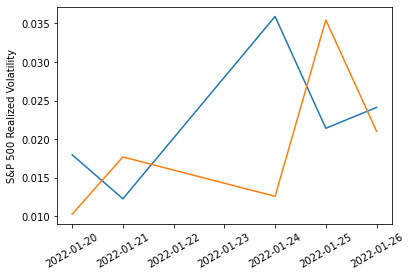

In [129]:
plt.plot(forecasts["ds"][55:60],Y_true[55:60])
plt.plot(forecasts["ds"][55:60],Y_hat[55:60])
plt.ylabel("S&P 500 Realized Volatility")
plt.xticks(rotation=30)

(0.006, 0.028)

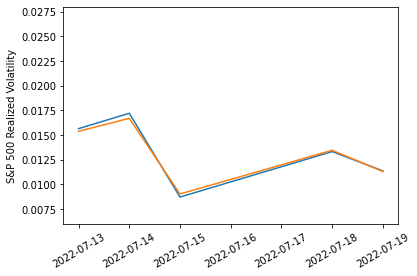

In [130]:
plt.plot(forecasts["ds"][175:180],Y_true[175:180])
plt.plot(forecasts["ds"][175:180],Y_hat[175:180])
plt.ylabel("S&P 500 Realized Volatility")
plt.xticks(rotation=30)
ax = plt.gca()
ax.set_ylim(0.006, 0.028)